# **MovieReviewSentiment [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data)**
---
- **Objective**: Build a sentiment analysis model to classify movie reviews as positive or negative.
- **Data**: Use IMDb dataset containing 50,000 labeled movie reviews.
- **Method**: Preprocess text, apply TF-IDF for feature extraction, and train a machine learning model (e.g., Logistic Regression).
- **Output**: A chatbot interface for real-time sentiment predictions based on user input.


In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
# Unzip the dataset
!unzip imdb-dataset-of-50k-movie-reviews.zip


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 97% 25.0M/25.7M [00:02<00:00, 21.1MB/s]
100% 25.7M/25.7M [00:02<00:00, 11.8MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd
data = pd.read_csv("/content/IMDB Dataset.csv")
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
import re
from sklearn.model_selection import train_test_split

def clean_text(text):
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

data['cleaned_review'] = data['review'].apply(clean_text)

X = data['cleaned_review']
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8941
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import joblib

model_path = '/content/drive/MyDrive/Semester Fall 2024/PROJ-NLP-Text Analytics/sentiment_model.joblib'

joblib.dump(model, model_path)

tfidf_path = '/content/drive/MyDrive/Semester Fall 2024/PROJ-NLP-Text Analytics/tfidf_vectorizer.joblib'
joblib.dump(tfidf, tfidf_path)

print(f"Model and vectorizer saved to {model_path}")


Model and vectorizer saved to /content/drive/MyDrive/Semester Fall 2024/PROJ-NLP-Text Analytics/sentiment_model.joblib


In [ ]:
import re
import joblib
'''
model = joblib.load('/content/drive/My Drive/sentiment_model.joblib')
tfidf = joblib.load('/content/drive/My Drive/tfidf_vectorizer.joblib')
'''
def preprocess_text(text):
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

def chat():
    print("Chatbot: Hello! Type 'exit' to stop.")

    while True:
        user_input = input("You: ")

        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        clean_text = preprocess_text(user_input)
        text_tfidf = tfidf.transform([clean_text])
        prediction = model.predict(text_tfidf)

        sentiment = 'positive' if prediction == 1 else 'negative'

        print(f"Chatbot: The sentiment is {sentiment}.")


In [ ]:
chat()

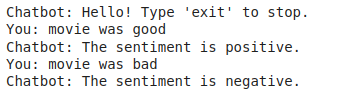

# **RNN LSTM GRU**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, SimpleRNN
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1


In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [ ]:
max_length = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')


In [ ]:
def create_rnn_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
    model.add(SimpleRNN(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
print("\nTraining RNN model...")
rnn_model = create_rnn_model(vocab_size, max_length)
rnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

rnn_predictions = rnn_model.predict(X_test_padded)
rnn_predictions = [1 if p > 0.5 else 0 for p in rnn_predictions]
rnn_accuracy = accuracy_score(y_test, rnn_predictions)
print(f"RNN Accuracy: {rnn_accuracy:.2f}")


Training RNN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 132s 255ms/step - accuracy: 0.4963 - loss: 0.7310 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 252ms/step - accuracy: 0.4991 - loss: 0.7029 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 151s 270ms/step - accuracy: 0.4914 - loss: 0.7047 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 133s 253ms/step - accuracy: 0.5041 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 251ms/step - accuracy: 0.4985 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6932
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step
RNN Accuracy: 0.50


In [ ]:
def create_lstm_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
print("\nTraining LSTM model...")
lstm_model = create_lstm_model(vocab_size, max_length)
lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

lstm_predictions = lstm_model.predict(X_test_padded)
lstm_predictions = [1 if p > 0.5 else 0 for p in lstm_predictions]
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")


Training LSTM model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 125ms/step - accuracy: 0.4960 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 79s 128ms/step - accuracy: 0.5045 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.5072 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.4964 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 64s 127ms/step - accuracy: 0.5040 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
LSTM Accuracy: 0.50


In [ ]:
def create_gru_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
    model.add(GRU(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
print("\nTraining GRU model...")
gru_model = create_gru_model(vocab_size, max_length)
gru_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

gru_predictions = gru_model.predict(X_test_padded)
gru_predictions = [1 if p > 0.5 else 0 for p in gru_predictions]
gru_accuracy = accuracy_score(y_test, gru_predictions)
print(f"GRU Accuracy: {gru_accuracy:.2f}")


Training GRU model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 64s 122ms/step - accuracy: 0.4975 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 119ms/step - accuracy: 0.4964 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 121ms/step - accuracy: 0.5028 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 119ms/step - accuracy: 0.5029 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 119ms/step - accuracy: 0.5010 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6938
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
GRU Accuracy: 0.50


#**Simple ChatBot for answering questions using NN V 1.1**




In [ ]:
!pip install tensorflow
!pip install keras
!pip install json
!pip install numpy

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [ ]:
import json
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
dataset = [
    {
        "question": "What is your name?",
        "answer": "My name is Marik."
    },
    {
        "question": "Who are you?",
        "answer": "I am an AI language model developed by Karim Mansor, known as Marik."
    },
    {
        "question": "What do people call you?",
        "answer": "People call me Marik."
    },
    {
        "question": "What can I call you?",
        "answer": "You can call me Marik."
    },
    {
        "question": "What is your purpose?",
        "answer": "My purpose is to assist and provide information to users through natural language conversations."
    },
    {
        "question": "What do you do?",
        "answer": "I generate responses based on the input provided by users and aim to assist them in various tasks."
    },
    {
        "question": "How would you describe yourself?",
        "answer": "I am an AI model capable of understanding and generating human-like text responses."
    },
    {
        "question": "What are you?",
        "answer": "I am an artificial intelligence model designed for conversational interactions."
    },
    {
        "question": "Can you introduce yourself?",
        "answer": "Sure! I'm Marik, an AI language model developed by Karim Masnor to engage in natural language conversations."
    }
]


In [ ]:
questions = [d['question'] for d in dataset]
answers = [d['answer'] for d in dataset]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions + answers)

In [ ]:
X = tokenizer.texts_to_sequences(questions)
y = tokenizer.texts_to_sequences(answers)

In [ ]:
max_len = max(len(seq) for seq in X + y)
X = pad_sequences(X, maxlen=max_len, padding='post')
y = pad_sequences(y, maxlen=max_len, padding='post')

In [ ]:
# model architecture
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0062 - loss: 4.2973
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2407 - loss: 4.1304
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3086 - loss: 3.9681
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3457 - loss: 3.7949
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3457 - loss: 3.6059
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3457 - loss: 3.4236
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3519 - loss: 3.3044
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3642 - loss: 3.2598
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3765 - loss: 3.2253
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3642 - loss: 3.1625
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3642 - loss: 3.0719
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3889 - loss

In [ ]:
def generate_response(question):
    question_seq = tokenizer.texts_to_sequences([question])
    question_seq = pad_sequences(question_seq, maxlen=max_len, padding='post')
    pred = model.predict(question_seq)
    next_word_index = np.argmax(pred, axis=-1)
    response = tokenizer.sequences_to_texts(next_word_index)
    return response

question = "Who  are you?"
response = generate_response(question)
print("Model:", response)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Model: ['i am an ai language model developed by karim mansor known as marik']


#**Simple ChatBot for answering questions using ML V 1.2**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Dataset
dataset = [
    {
        "question": "What is your name?",
        "answer": "My name is Marik."
    },
    {
        "question": "Who are you?",
        "answer": "I am an AI language model developed by Karim Mansor, known as Marik."
    },
    {
        "question": "What do people call you?",
        "answer": "People call me Marik."
    },
    {
        "question": "What can I call you?",
        "answer": "You can call me Marik."
    },
    {
        "question": "What is your purpose?",
        "answer": "My purpose is to assist and provide information to users through natural language conversations."
    },
    {
        "question": "What do you do?",
        "answer": "I generate responses based on the input provided by users and aim to assist them in various tasks."
    },
    {
        "question": "How would you describe yourself?",
        "answer": "I am an AI model capable of understanding and generating human-like text responses."
    },
    {
        "question": "What are you?",
        "answer": "I am an artificial intelligence model designed for conversational interactions."
    },
    {
        "question": "Can you introduce yourself?",
        "answer": "Sure! I'm Marik, an AI language model developed by Karim Masnor to engage in natural language conversations."
    },
]

In [ ]:
questions = [d['question'] for d in dataset]
answers = [d['answer'] for d in dataset]

labels = list(range(len(answers)))


X_train, X_test, y_train, y_test = train_test_split(questions, labels, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

new_question = "what you do?"
new_question_tfidf = vectorizer.transform([new_question])
predicted_label = svm_model.predict(new_question_tfidf)
predicted_answer = answers[predicted_label[0]]
print("Predicted answer:", predicted_answer)

Predicted answer: I generate responses based on the input provided by users and aim to assist them in various tasks.
